In [266]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
with open('../dot_team/new.json') as data_file:
    data = json.load(data_file)[0]

In [268]:
username = data['FullName']
posts = data['posts']
followers = data['Followers']
folowing = data['Folowing']

In [298]:
#data

In [299]:
#folowing, followers

Followers  317 
Folowing  720


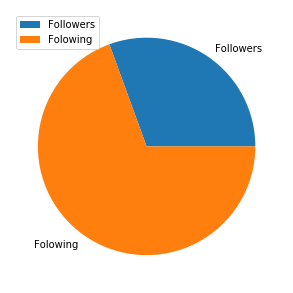

In [271]:
df = pd.DataFrame({'': [followers, folowing]},
                   index=['Followers', 'Folowing'])
plot = df.plot.pie(y='', figsize=(5, 5))
print('Followers ', followers, '\nFolowing ', folowing)

In [272]:
data = pd.DataFrame(columns=['likes', 'comments', 'location', 'date'])

In [273]:
for i in range(len(posts)):
    posts[i]['date'] = datetime.fromtimestamp(posts[i]['date'])
    data = data.append(posts[i], ignore_index=True)
data.drop('id', axis=1, inplace=True)

In [274]:
data['weekday'] = data['date'].dt.day_name()

In [275]:
data['year'] = [d.year for d in data.date]
data['month'] = [d.month for d in data.date]
data['hour'] = [d.hour for d in data.date]
data['day'] = [d.day for d in data.date]

In [300]:
data.head()

,likes,comments,location,date,weekday,year,month,hour,day
0,97,8,"Almaty, Kazakhstan",2019-06-26 16:45:45,Wednesday,2019,6,16,26
1,107,19,"Almaty, Kazakhstan",2019-03-21 21:41:29,Thursday,2019,3,21,21
2,136,4,"Almaty, Kazakhstan",2019-02-02 00:14:11,Saturday,2019,2,0,2
3,119,10,"New York, New York",2018-11-12 21:31:12,Monday,2018,11,21,12
4,88,2,"New York, New York",2018-10-04 03:49:15,Thursday,2018,10,3,4


# count of avg(likes) per weekday

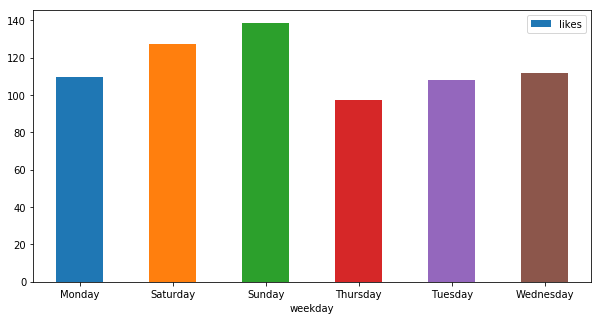

In [301]:
data['likes'] = data['likes'].astype(int)
d = data.groupby('weekday')['likes'].mean()
d = pd.DataFrame({'weekday': d.index, 'likes': d.values})
d.plot.bar(x='weekday', y='likes', rot=0, figsize=(10, 5));

# count mean of comments per weekday

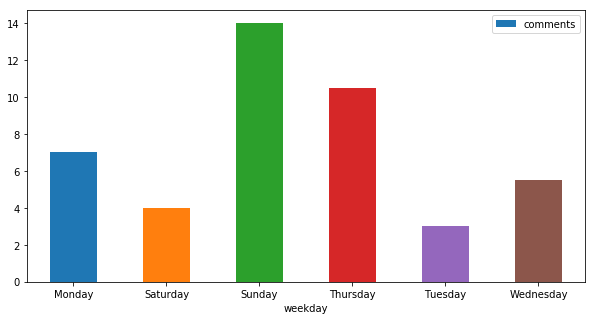

In [254]:
data['comments'] = data['comments'].astype(int)
d = data.groupby('weekday')['comments'].mean()
#print(d.values)

#d = data.groupby('weekday')['comments'].sum()
d = pd.DataFrame({'weekday': d.index, 'comments': d.values})
d.plot.bar(x='weekday', y='comments', rot=0, figsize=(10, 5));

In [255]:
d = data[data['year']==2019]

# Count of posts per month in last year

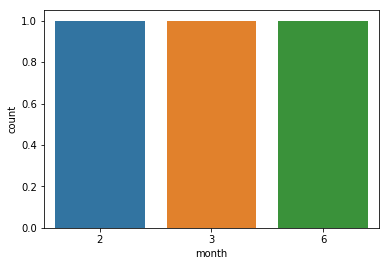

In [256]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'month', data = d);

# when is the best time to post (likes)

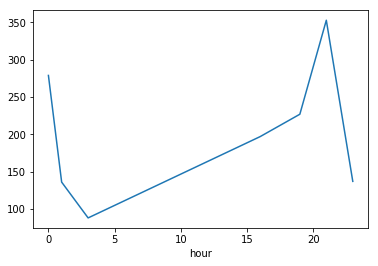

In [257]:
# for likes
data.groupby('hour')['likes'].sum().plot();

# when is the best time to post (coments)

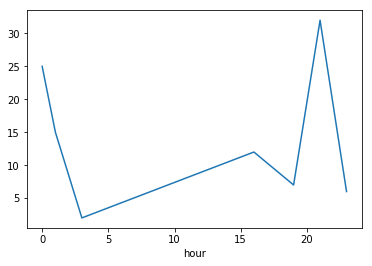

In [258]:
#for comments
data.groupby('hour')['comments'].sum().plot();

# most liked post

In [259]:

data[data['likes'] == data.likes.max()]


,likes,comments,location,date,weekday,year,month,hour,day
11,143,21,None,2017-10-15 00:34:09,Sunday,2017,10,0,15


In [260]:
#data['location'] = ['Almaty', 'Almaty', 'Almaty', 'New York', 'New York', 'London', 'London', 'Switzerland', 'Milan', 'Milan', 'Milan', 'Milan']

In [303]:
data.head()

,likes,comments,location,date,weekday,year,month,hour,day
0,97,8,"Almaty, Kazakhstan",2019-06-26 16:45:45,Wednesday,2019,6,16,26
1,107,19,"Almaty, Kazakhstan",2019-03-21 21:41:29,Thursday,2019,3,21,21
2,136,4,"Almaty, Kazakhstan",2019-02-02 00:14:11,Saturday,2019,2,0,2
3,119,10,"New York, New York",2018-11-12 21:31:12,Monday,2018,11,21,12
4,88,2,"New York, New York",2018-10-04 03:49:15,Thursday,2018,10,3,4


In [304]:
#data.groupby('location')['date'].agg(['min', 'max'])

In [289]:
data_for_cities = []
previous = pd.Series(data.iloc[0])
previous['location'] = ''
days_in_holiday = 0
i = 0
holidays = {}
index_start = 0

for index, row in data.iterrows():
    #print(type(row)
    location = row['location']
    if previous['location'] == location:
        days_in_holiday += (previous['date'] - row['date']).days
    else:
        #print()datetime.today() - timedelta(days=days_to_subtract)
        holidays[i] = {'location': previous.location, 'start': previous.date  - timedelta(days=days_in_holiday), 'days': days_in_holiday, 'finish': previous.date, 'posts_count': index - index_start}
        data_hol = [previous.location, previous.date  - timedelta(days=days_in_holiday), days_in_holiday, previous.date, index - index_start]
        data_for_cities.append(data_hol)
        i += 1
        previous = row
        days_in_holiday = 0
        index_start = index
        
del data_for_cities[0]  
del holidays[0]

In [305]:
#data_for_cities

In [306]:
data_cities = pd.DataFrame(data_for_cities, columns=['location', 'start', 'days', 'finish', 'post_count'])

In [307]:
data_cities

,location,start,days,finish,post_count
0,"Almaty, Kazakhstan",2018-10-29 16:45:45,240,2019-06-26 16:45:45,3
1,"New York, New York",2018-10-04 21:31:12,39,2018-11-12 21:31:12,2
2,"London, United Kingdom",2018-08-05 19:42:35,27,2018-09-01 19:42:35,2
3,Switzerland,2018-03-26 19:46:22,1,2018-03-27 19:46:22,2


# cities how many days was there

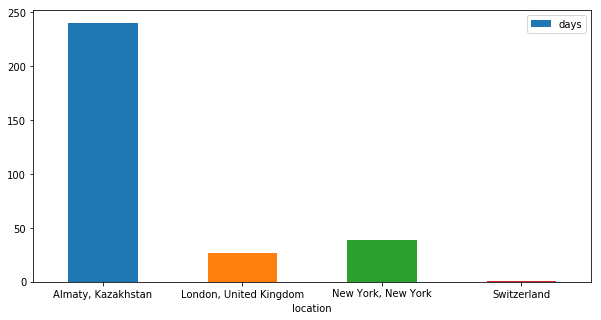

In [308]:
d = data_cities.groupby('location')['days'].sum()
d = pd.DataFrame({'location': d.index, 'days': d.values})
d.plot.bar(x='location', y='days', rot=0, figsize=(10, 5));

# how many times he was there

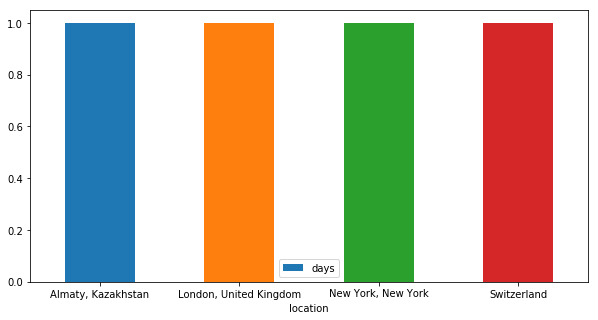

In [297]:
d = data_cities.groupby('location')['days'].count()
d = pd.DataFrame({'location': d.index, 'days': d.values})
d.plot.bar(x='location', y='days', rot=0, figsize=(10, 5));